# Praca domowa 6 
#### Patrycja Gromada, Wstęp do Eksploracji Danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned.csv")

#Poprawianie kolumny RAM
#Kolumna RAM zawierała nie tylko dane liczbowe, ale także dane typu "64gb" "32 GB", które poniżej zmieniam na właściwe, liczbowe.
def extract_ram(ram_str):
    try:
        return int(ram_str.split()[0])
    except ValueError:
        return np.nan

df['RAM'] = df['RAM'].apply(extract_ram)
df = df.dropna(subset=['RAM'])
df['RAM'] = df['RAM'].astype('float64')

## Opis zbioru danych

Praca domowa polegała na przygotowaniu ekploracyjnej analizy danych. Dane pochodzą ze strony: https://www.kaggle.com/datasets/keremabdullahoglu/laptop-price-dataset-april-2024

Zbiór danych został pobrany ze strony eBay przy użyciu API. Zawiera dane o nie tylko nowych, ale także o odnowionych lub używanych laptopach. Zawiera infomacje o marce, modalach, RAMie, przekątnej ekranu, rozdzielczościach ekranu, GPU, kondycji jak i cenie urządzenia.  

In [3]:
df.head()

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
0,Lenovo,Lenovo ThinkPad 14” HD Laptop PC Computer Core...,14.0,16.0,Intel Core i5 7th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,189.99
1,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB ...",15.6,64.0,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,349.99
2,HP,"NEW HP 15 Laptop. 15.6"" 1080p, i5-1135G7, 8GB ...",15.6,8.0,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,369.95
4,Lenovo,"2024 Lenovo Ideapad Laptop 15.6"" FHD Touch Int...",15.6,16.0,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,499.00
5,Microsoft,"Microsoft Surface Laptop 5 13.5"" - 512GB SSD, ...",13.5,8.0,Intel Core i5 12th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,2256 x 1504,Open box,349.00


Wielkość zbioru danych: 2921 wierszy, 10 kolumn

In [4]:
df.shape

(2921, 10)

Występujące typy zmiennych: float64, int64, object

In [5]:
df.dtypes

Brand                   object
Product_Description     object
Screen_Size            float64
RAM                    float64
Processor               object
GPU                     object
GPU_Type                object
Resolution              object
Condition               object
Price                  float64
dtype: object

## Analiza zmiennych - policzenie statystyk

Zbiór danych zawiera tylko 3 kolumny z liczbowymi danymi: Screen_Size, RAM i Price. Poniżej znajdują się statystyki dla każdej z zmiennej. Count jest niepotrzebne, zwraca liczbę rekordów w całej ramce. 

In [6]:
df.describe()

,Screen_Size,RAM,Price
count,2921.000000,2921.000000,2921.00000
mean,14.553167,14.945567,517.92153
std,1.174508,13.945691,235.46030
min,10.000000,4.000000,0.00000
25%,14.000000,8.000000,328.00000
50%,14.000000,16.000000,489.99000
75%,15.600000,16.000000,699.00000
max,18.000000,512.000000,999.99000


## Analiza zmiennych w zależności od przynależności do grupy

Wybrałam zmienną jakościową - marka (Brand). Ponownie za pomocą funkcji "describe" mogę łatwo zaanalizać dane, aczkolwiek nie zrobiłam tego, bo wychodzi ogromna ramka z podsumowaniem statystyk, z której ciężko coś odczytać. Skupię się na znalezieniu średniej ceny, RaMU i Screen_Size dla marki oraz znalezienia najdroższej i najtańszej marki. 

Średnia ceny dla poszczególnych marek; od najdroższych do najtańszych. 

In [7]:
brand = df[['Brand','Price', 'Screen_Size', 'RAM']].groupby('Brand').mean().sort_values(by="Price", ascending=False)
brand


,Price,Screen_Size,RAM
Brand,,,
Ruggon,800.000000,10.100000,8.000000
Eurocom,800.000000,15.600000,32.000000
Getac,759.490000,13.300000,8.000000
Intel,724.995000,14.550000,12.000000
MSI,718.793226,15.374194,14.064516
LG,694.176579,16.031579,16.000000
Samsung,647.595082,14.513115,16.131148
Gigabyte,631.463333,15.033333,16.000000
Microsoft,606.035026,13.086387,11.015707


Najdroższymi markami okazuje się być średnio Ruggon i Eurocom, a najtańszą ByteSpeed. Eurocom ma również średnio najwięcej ramu - 32GB. Poniżej także wykres podsumuwujący powyższe średnie. 

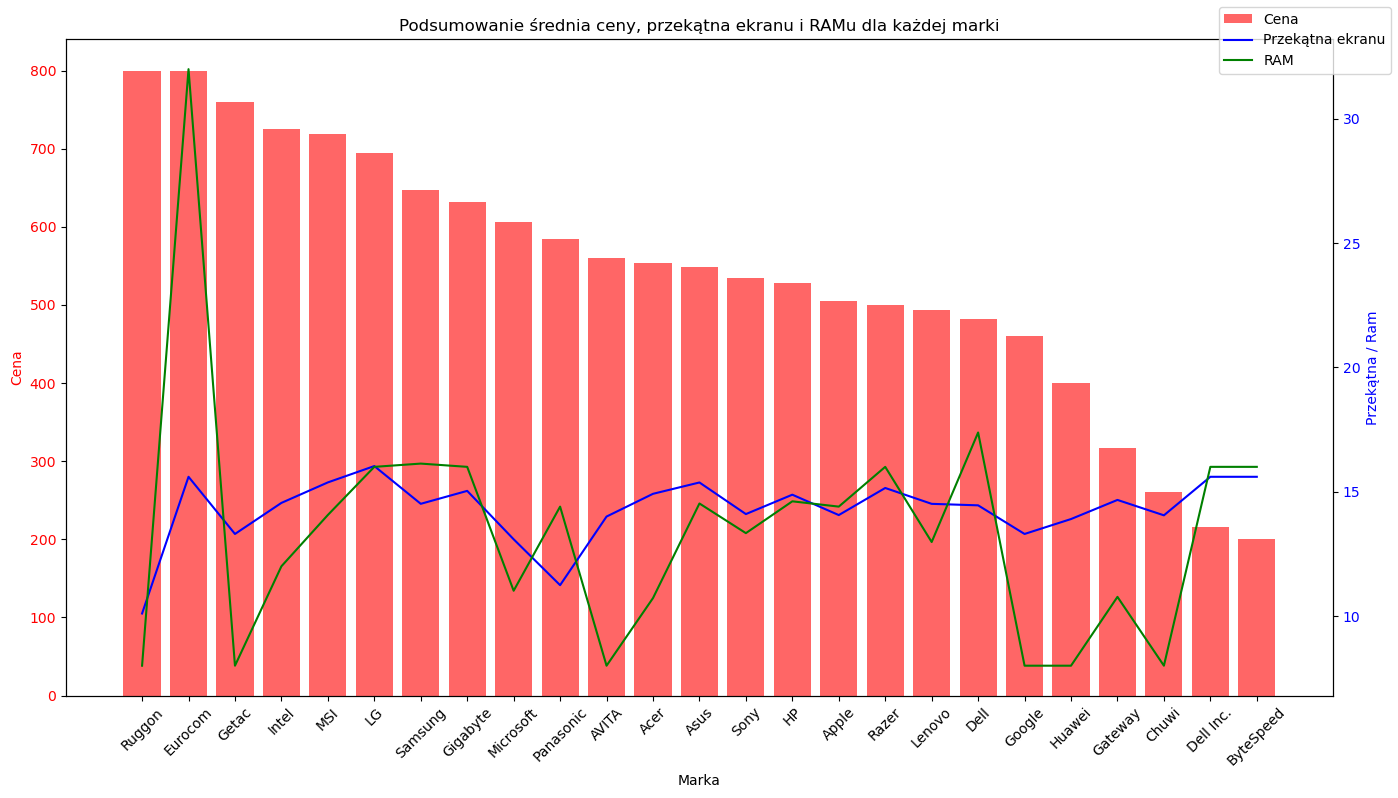

In [8]:
# Wykresik podsumuwujący
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(rotation=45)

# Cena bar plot
ax1.bar(brand.index, brand['Price'], color='red', alpha=0.6, label='Cena')
ax1.set_xlabel('Marka')
ax1.set_ylabel('Cena', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Druga Oska
ax2 = ax1.twinx()
ax2.plot(brand.index, brand['Screen_Size'], color='blue', label='Przekątna ekranu')
ax2.plot(brand.index, brand['RAM'], color='green', label='RAM')
ax2.set_ylabel('Przekątna / Ram', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')



# Inne
fig.legend(loc="upper right")

plt.title('Podsumowanie średnia ceny, przekątna ekranu i RAMu dla każdej marki')

fig.tight_layout()
plt.show()

## Rozkład zmiennych w zbiorze danych

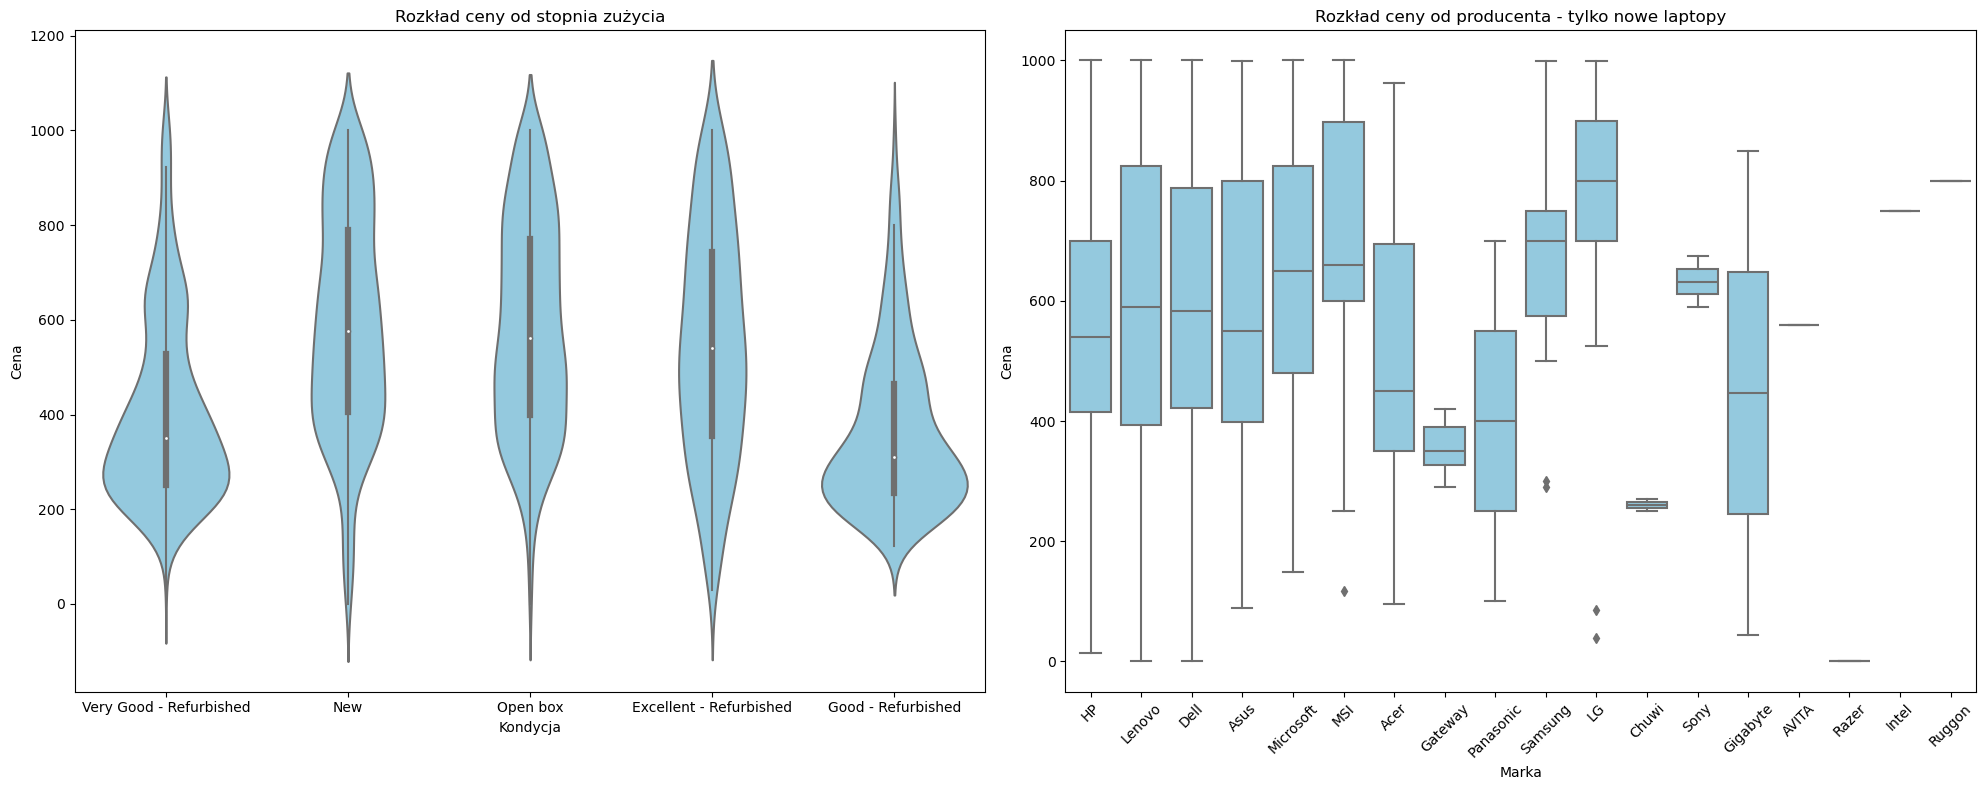

In [9]:
new_laptops = df[df['Condition'] == 'New']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.xticks(rotation=45)

# Wykres 1: Rozkład ceny od stopnia zużycia
sns.violinplot(ax=axes[0], x='Condition', y='Price', data=df, color='skyblue')
axes[0].set_title('Rozkład ceny od stopnia zużycia')
axes[0].set_xlabel('Kondycja')
axes[0].set_ylabel('Cena')

# Wykres 2: Rozkład ceny od producenta (tylko nowe laptopy)
sns.boxplot(ax=axes[1], x='Brand', y='Price', data=new_laptops, color='skyblue')
axes[1].set_title('Rozkład ceny od producenta - tylko nowe laptopy')
axes[1].set_xlabel('Marka')
axes[1].set_ylabel('Cena')


plt.tight_layout()
plt.show()

**Wnioski:**

Kategoria "Very Good - Refurbished" i "Good - Refubished" mają bardzo podobne wykresy gęstości. Najwięcej obserwacji jest przy 200-300 dolarów. Możemy zauważyć, że dla nowych laptopów ceny zazwyczaj zaczynają się od 300 dolarów, a sięgają nawet 1100 dolarów. "New", "Open box" i "excellent - Refubished" mają bardzo podobne gęstości. 

Najwięszy rozstęp ma marka Lenovo, ceny zaczynają się od 0 aż do 1000 dolarów za nowy produkt. Marki takie jak AVITA, Razer, INtel i Ruggon mają tylko pojedyncze obserwacje w zbiorze danych. 

## Zależności w zbiorze danych

W ramce danych znajdują się 3 kolumny z danymi liczbowymi, więc spróbuję znaleźć zależność ceny od kolejno wielkości ekranu i ilości RAM. 

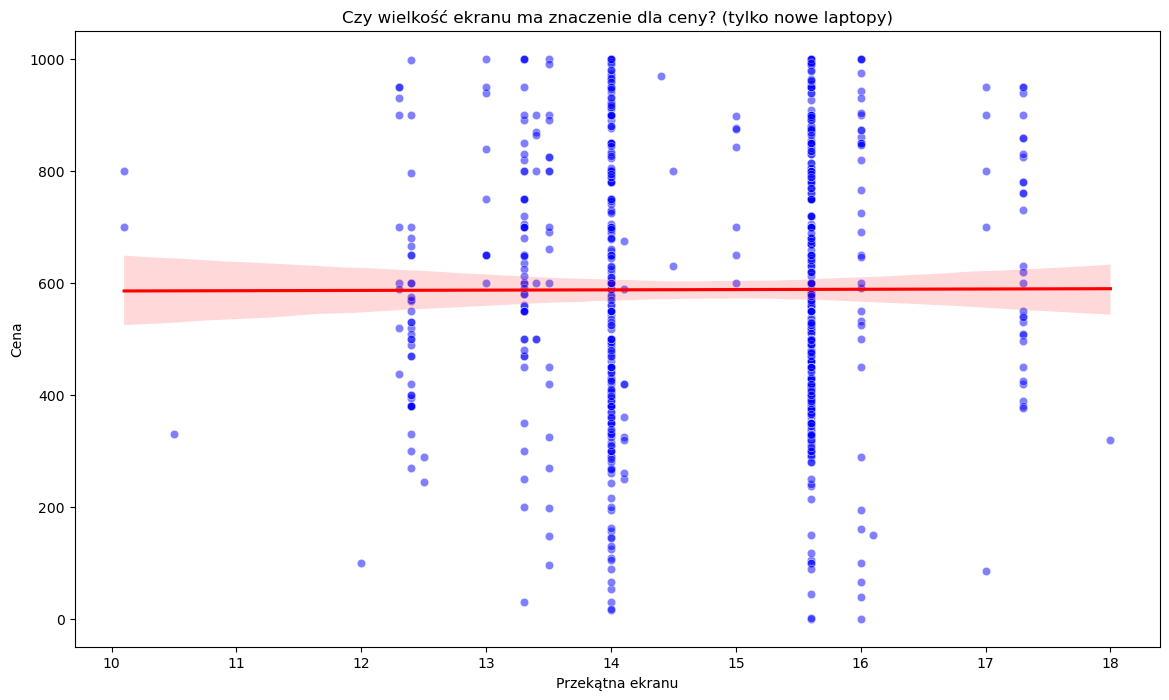

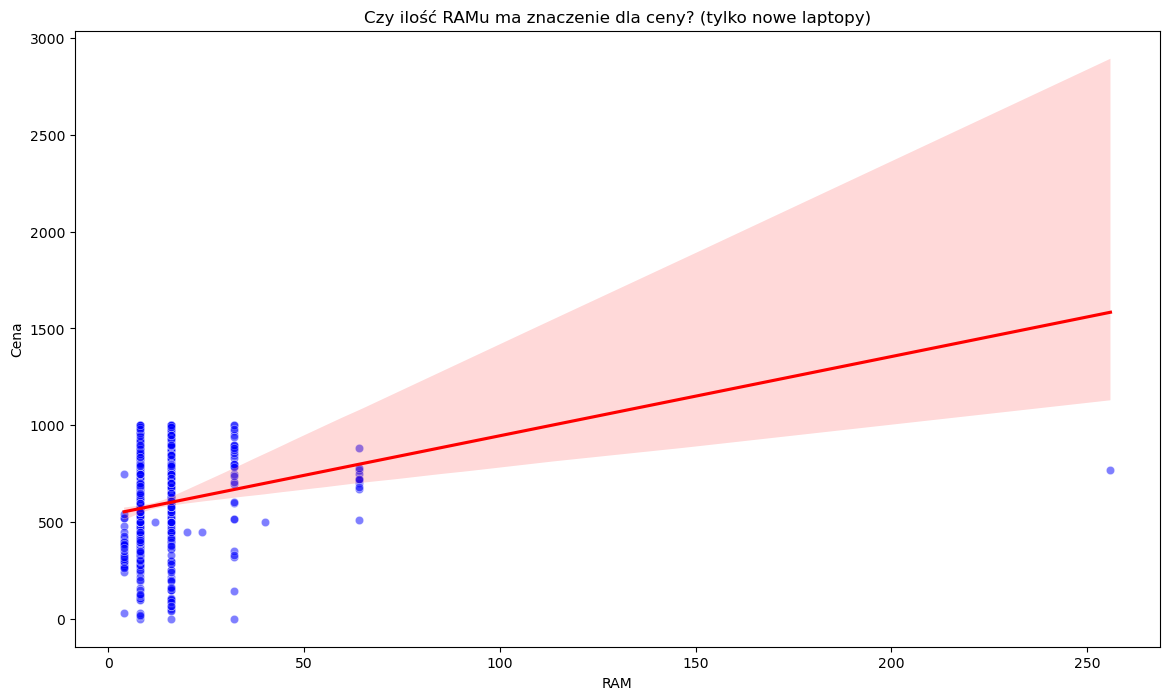

In [10]:

new_laptops = df[df['Condition'] == 'New']

# Czy wielkość ekranu ma znaczenie dla ceny?
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Screen_Size', y='Price', data=new_laptops, color='blue', alpha=0.5)
sns.regplot(x='Screen_Size', y='Price', data=new_laptops, scatter=False, color='red')
plt.title('Czy wielkość ekranu ma znaczenie dla ceny? (tylko nowe laptopy)')
plt.xlabel('Przekątna ekranu')
plt.ylabel('Cena')
plt.show()

# Czy ilość RAM ma znaczenie dla ceny?
plt.figure(figsize=(14, 8))
sns.scatterplot(x='RAM', y='Price', data=new_laptops, color='blue', alpha=0.5)
sns.regplot(x='RAM', y='Price', data=new_laptops, scatter=False, color='red')
plt.title('Czy ilość RAMu ma znaczenie dla ceny? (tylko nowe laptopy)')
plt.xlabel('RAM')
plt.ylabel('Cena')
plt.show()

**Wnioski:**

Nie, nie ma jasnej zależnosci ceny od ekranu. Możemy wywnioskować, że najwięcej laptopów ma 14" lub 15'6". Laptop o przekątnej 10" kosztował 800 dolarów, gdy największy laptop o przekątnej 18" mniej niż 400 dolarów. 

Na drugim wykresie widzimy lekką zależność, tak jak można było się spodziewać wraz ze wzrostem RAMu wzrasta cena. Nie miałam analizy zależnosci jako przedmiotu, ale z tego co się dowiedziałam taki rorzut wokól linii trendu jest raczej zły niż dobry. Usunę outlinera, aby wyciągnąć lepsze wnioski. 

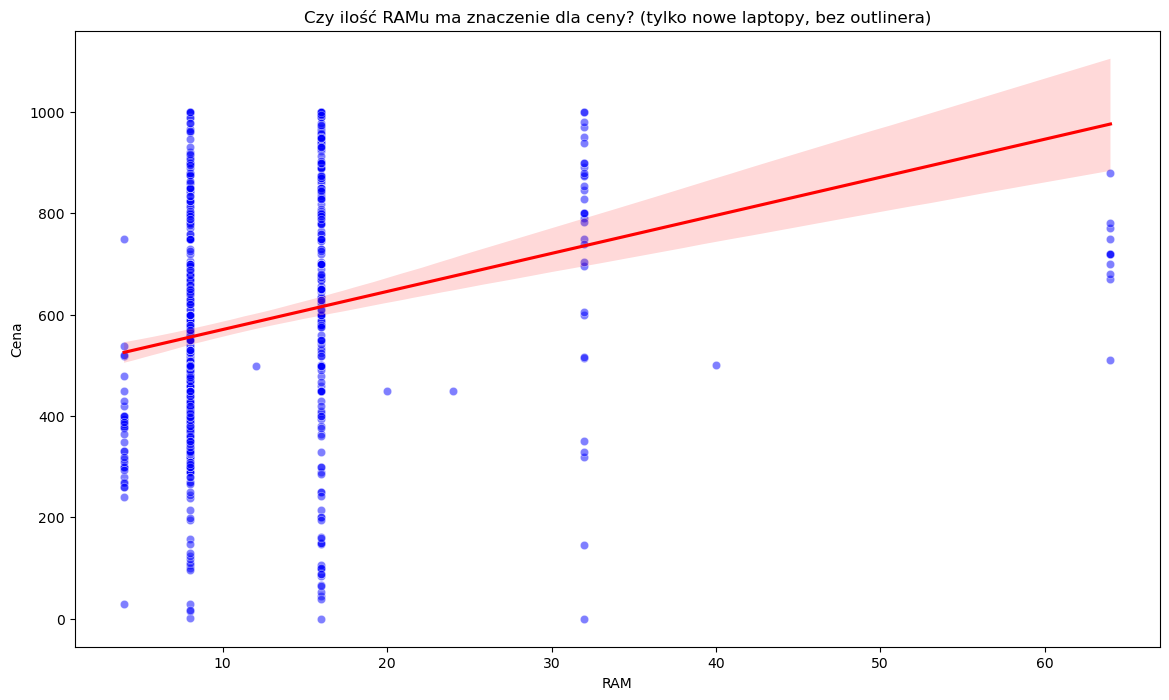

In [11]:
new_laptops = df[df['Condition'] == 'New']
new_laptops = new_laptops.drop(new_laptops['RAM'].idxmax()) 


# Czy ilość RAM ma znaczenie dla ceny - bez outlinera?
plt.figure(figsize=(14, 8))
sns.scatterplot(x='RAM', y='Price', data=new_laptops, color='blue', alpha=0.5)
sns.regplot(x='RAM', y='Price', data=new_laptops, scatter=False, color='red')
plt.title('Czy ilość RAMu ma znaczenie dla ceny? (tylko nowe laptopy, bez outlinera)')
plt.xlabel('RAM')
plt.ylabel('Cena')
plt.show()

Nadal widzimy, że jest widoczna tendencja rosnąca, czyli tak, im więcej RAMu, tym laptop droższy. 

Na marginesie, tutaj jest ten outliner - laptop, który ma 256 GB RAMu: NEW Samsung Galaxy Book Pro 15.6”

In [12]:
new_laptops = df[df['Condition'] == 'New']
new_laptops.loc[new_laptops['RAM'].idxmax()]

Brand                                                            Samsung
Product_Description    NEW Samsung Galaxy Book Pro 15.6” FHD Intel Co...
Screen_Size                                                         15.6
RAM                                                                256.0
Processor                                        Intel Core i5 11th Gen.
GPU                                                                  NaN
GPU_Type                                                             NaN
Resolution                                                   1920 x 1080
Condition                                                            New
Price                                                             769.89
Name: 2662, dtype: object